In [1]:
import pandas as pd
import numpy as np
import json
import ast

In [3]:
# PROCESO DE ETL
'''Extracción
La primera parte del proceso consiste en la extraccion de los datos desde su punto de origen, 
en nuestro caso se encuentran en un conjunto de datasets proporcionados por la empresa steam de tipo json.'''

In [4]:
games = 'datasets/output_steam_games.json'

# Se lee de cada línea del dataset
rows = []
with open(games) as f:
    for line in f.readlines():
        data = json.loads(line)
        rows.append(data)

# Se convierte a dataframe
games = pd.DataFrame(rows)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [5]:
games.sample()


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
20499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
reviews = 'datasets/australian_user_reviews.json'

# Se lee de cada línea del dataset
rows.clear()
with open(reviews, encoding='utf-8') as f:
    for line in f.readlines():
        data = ast.literal_eval(line)
        rows.append(data)

# Se convierte a dataframe
reviews = pd.DataFrame(rows)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


In [8]:
reviews.sample()


,user_id,user_url,reviews
25146,76561198107121855,http://steamcommunity.com/profiles/76561198107...,"[{'funny': '', 'posted': 'Posted November 12, ..."


In [10]:
items = 'datasets/australian_users_items.json'

# Se lee de cada línea del dataset
rows.clear()
with open(items, encoding='utf-8') as f:
    for line in f.readlines():
        data = ast.literal_eval(line)
        rows.append(data)

# Se convierte a dataframe
items = pd.DataFrame(rows)
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


In [11]:
items.sample()


,user_id,items_count,steam_id,user_url,items
80793,76561198092233031,0,76561198092233031,http://steamcommunity.com/profiles/76561198092...,[]


In [12]:
#Transform
'''La fase de transformacion aplica una serie de reglas de negocio sobre los datos extraidos para poder 
limpiarlos y tener una buena calidad de estos al momento de cargarlos, la gravedad de estas transformaciones 
dependera de como se encuentren los datos extraidos. Segun nuestras tablas se requiere de una normalizacion 
en ellas y de algunos casting para mayor legibilidad y utilidad al momento de realizar la carga y otras operaciones.'''

print(f'Campos vacios en games: {games.isna().sum().sum()}')
print(f'Campos vacios en reviews: {reviews.isna().sum().sum()}')
print(f'Campos vacios en items: {items.isna().sum().sum()}')

Campos vacios en games: 1168997
Campos vacios en reviews: 0
Campos vacios en items: 0


In [13]:
#Resolvemos
games.dropna(inplace=True)
print(f'Vacios en games: {games.isna().sum().sum()}')

Vacios en games: 0


In [ ]:
#Normalización de la columna Games



In [14]:
games.sample(3)


,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
99488,Mia Blais-Côté,"[Casual, Simulation]",The Art of Les Quatre Alices,The Art of Les Quatre Alices,http://store.steampowered.com/app/676670/The_A...,2017-08-28,"[Casual, Simulation, Visual Novel, Singleplaye...",http://steamcommunity.com/app/676670/reviews/?...,"[Single-player, Downloadable Content, Steam Ac...",0.99,False,676670,Mia Blais-Côté
107408,Degica,[Action],DARIUSBURST Chronicle Saviours - Side Arms Hyp...,DARIUSBURST Chronicle Saviours - Side Arms Hyp...,http://store.steampowered.com/app/572380/DARIU...,2017-02-15,[Action],http://steamcommunity.com/app/572380/reviews/?...,"[Single-player, Downloadable Content, Full con...",4.99,False,572380,"Pyramid,Chara-Ani,G.rev Ltd."
102819,FomoonSoft,"[Action, Indie, Early Access]",Keyscaper,Keyscaper,http://store.steampowered.com/app/732980/Keysc...,2017-10-27,"[Early Access, Action, Indie, Violent]",http://steamcommunity.com/app/732980/reviews/?...,"[Multi-player, Online Multi-Player]",7.99,True,732980,FomoonSoft


In [15]:
print(f"Registro iguales entre la columna app_name y title: {(games['app_name']==games['title']).sum()}")
print(f"Cantidad de registros en el dataframe 'games': {len(games)}")

Registro iguales entre la columna app_name y title: 22179
Cantidad de registros en el dataframe 'games': 22530


In [ ]:
'''La mayoria de los valores de una columna se encuentran en la otra, asi que dejaremos una de las dos 
para que sirva de referencia total al nombre del videojuego y aprovecharemos para eliminar columnas que 
no utilizaremos'''

In [16]:
games.drop(columns=['app_name','specs','early_access','publisher','tags','reviews_url'],inplace=True)


In [ ]:
games = games.explode('genres')


In [17]:
games['price'] = pd.to_numeric(games['price'],errors='coerce').astype(float)
games['price'].fillna(0,inplace=True)

In [18]:
games[games['price']==0]


,genres,title,url,release_date,price,id,developer
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.0,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,0.0,670290,Poolians.com
88370,"[Casual, Indie]",Zen of Sudoku,http://store.steampowered.com/app/4900/Zen_of_...,2006-12-14,0.0,4900,Unknown Worlds Entertainment
88501,[Action],Mare Nostrum,http://store.steampowered.com/app/1230/Mare_No...,2008-10-17,0.0,1230,Sandstorm Productions
88558,"[Action, Simulation]",Darkest Hour: Europe '44-'45,http://store.steampowered.com/app/1280/Darkest...,2009-06-09,0.0,1280,Darklight Games
...,...,...,...,...,...,...,...
120287,"[Free to Play, Indie, RPG, Strategy]",Aurora Trail,http://store.steampowered.com/app/755150/Auror...,2017-12-28,0.0,755150,Screenhit Studios
120303,"[Free to Play, Simulation]",Six Days of Snow,http://store.steampowered.com/app/754810/Six_D...,2017-12-29,0.0,754810,ebi-hime
120317,"[Action, Casual, Free to Play, Indie]",Bloodworks,http://store.steampowered.com/app/717990/Blood...,2018-01-01,0.0,717990,Engin Mercan
120410,"[Action, Free to Play, Massively Multiplayer, ...",忍者村大战2,http://store.steampowered.com/app/754350/2/,2018-01-03,0.0,754350,杭州分浪网络科技有限公司


In [20]:
#Modificaciones para un futuro merge con la tabla item que nos permita unificar las tres tablas

games.rename(columns={"title":"game_title"},inplace=True)

In [21]:
games['release_date'] = pd.to_datetime(games['release_date'],errors='coerce')
games.dropna(inplace=True)

In [22]:
games.sample()


,genres,game_title,url,release_date,price,id,developer
119269,"[Action, Adventure]",Alan Wake's American Nightmare,http://store.steampowered.com/app/202750/Alan_...,2012-05-22,9.99,202750,Remedy Entertainment


In [23]:
#Reviews
reviews.sample()


,user_id,user_url,reviews
23218,76561198080270958,http://steamcommunity.com/profiles/76561198080...,"[{'funny': '', 'posted': 'Posted October 18, 2..."


In [24]:
### Otra columna multivaluada

reviews['reviews'].iloc[0]




[{'funny': '',
  'posted': 'Posted November 5, 2011.',
  'last_edited': '',
  'item_id': '1250',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
 {'funny': '',
  'posted': 'Posted July 15, 2011.',
  'last_edited': '',
  'item_id': '22200',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': "It's unique and worth a playthrough."},
 {'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True,
  'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so buy the game so I get a sequel!'}]

In [25]:
# Desglosamos
reviews = reviews.explode('reviews')

In [26]:
# Dividimos cada llave de cada diccionario dentro de su propia columna dentro de nuestro dataset
reviews['posted'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['posted'])
reviews['item_id'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['item_id'])
reviews['recommend'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['recommend'])
reviews['review'] = reviews['reviews'].apply(lambda x: np.nan if isinstance(x,float) else x['review'])

In [27]:
print(f"Vacios: {reviews.isna().sum().sum()}")
reviews.dropna(inplace=True)
print(f"Vacios: {reviews.isna().sum().sum()}")

Vacios: 140
Vacios: 0


In [28]:
# Eliminamos la sobrante
reviews.drop(columns=['reviews'],inplace=True)

In [29]:
reviews.sample()


,user_id,user_url,posted,item_id,recommend,review
20053,saalazar,http://steamcommunity.com/id/saalazar,Posted February 2.,730,True,10/10


In [30]:
# Las columnas de fechas deberian tener todas un mismo formato
# Dividimos las cadenas de texto en mes dia y año
reviews['posted'] = reviews['posted'].str.replace(',','').str.replace('.','').str.replace('Posted','').str.split()

# Creamos un hashmap para la traducción de string a numero como referencia del mes 
months = {
  'January': 1,
  'February': 2,
  'March': 3,
  'April': 4,
  'May': 5,
  'June': 6,
  'July': 7,
  'August': 8,
  'September': 9,
  'October': 10,
  'November': 11,
  'December': 12
}
# Array para añadir cada registro ya traducido posteriormente al dataframe
dates=[]
for i,x in enumerate(reviews.itertuples()): # Se itera los registros

  if len(x.posted)==3: # Si el campo posee todo los campos encesarios para tener una fecha entonces se declara la fecha
    date = f"{x.posted[2]}-{months[x.posted[0]]}-{x.posted[1]}" 
  else: 
    date = np.nan

  dates.append(pd.to_datetime(date).date())

reviews['posted'] = pd.DataFrame(dates) # Se añaden a la columna del dataframe


In [31]:
# Feature Engineering

'''Para una consulta en nuestra API vamos a necesitar una nueva columna que nos 
especifique cual es el sentimiento que emerge de las palabras de las reviews de 
los usuarios. Para eso utilizaremos una libreria famosa para el procesamiento de 
lenguaje natural que nos colaborará en el proceso.'''

from nltk.sentiment.vader import SentimentIntensityAnalyzer

SID = SentimentIntensityAnalyzer()
analysis = []

for x in reviews.itertuples():
  sentiment = SID.polarity_scores(x.review)['compound']
  if sentiment<-.2:
    value = 0
  elif sentiment>.2:
    value = 2
  else:
    value = 1
  analysis.append(value)

reviews['sentiment'] = pd.DataFrame(analysis)


In [32]:
reviews.sample()


,user_id,user_url,posted,item_id,recommend,review,sentiment
2853,force445,http://steamcommunity.com/id/force445,2015-03-19,440,False,เกมกากสัส,1


In [33]:
items.sample()


,user_id,items_count,steam_id,user_url,items
27692,76561198004007202,162,76561198004007202,http://steamcommunity.com/profiles/76561198004...,"[{'item_id': '320', 'item_name': 'Half-Life 2:..."


In [ ]:
# Otra columna multivariada

In [34]:
# Se divide las listas por registro
items = items.explode('items')

In [35]:
# Dividimos cada llave de cada diccionario dentro de su propia columna dentro de nuestro dataset
items['item_id'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['item_id'])
items['item_name'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['item_name'])
items['playtime_forever'] = items['items'].apply(lambda x: np.nan if isinstance(x,float) else x['playtime_forever'])

In [36]:
# Validamos vacios
print(f"Vacios: {items.isna().sum().sum()}")
items.dropna(inplace=True)
print(f"Vacios: {items.isna().sum().sum()}")

Vacios: 67224
Vacios: 0


In [37]:
# Eliminamos columnas innecesarias
items.drop(columns=['items','steam_id','items_count','user_url'],inplace=True)

In [38]:
items.rename(columns={"item_name":"game_title"},inplace=True)

In [39]:
items.sample()


,user_id,item_id,game_title,playtime_forever
26453,76561198276571851,214490,Alien: Isolation,380.0


In [40]:
#Load

''' Por último cargamos nuestros datos ya procesados a un sistema de origen. 
Este sistema dependera bastante de los requisitos de la organización y varía 
según sus objetivos. Para este proyecto la carga se hará directamente en la 
Web mediante una API y en esta ocasión exportaremos solo parte de nuestro 
gran dataset, por cuestion de rendimiento, eficiencia y funcionamiento de 
la aplicacion que utilizaremos para el despliegue, Render. 
Para ser mas claros estos servicios poseen una prueba gratuita p
ero bastante limitada en cuestión de memoria.'''

game_item = pd.merge(games,items,on='game_title')
game_item.drop(columns=['game_title','url','id','item_id'],inplace=True)
game_item['release_date'] = pd.to_datetime(game_item['release_date']).dt.year

In [41]:
game_item.sample()

,genres,release_date,price,developer,user_id,playtime_forever
194199,"[Action, Adventure, Indie]",2010,19.99,Frictional Games,Phatlipz,0.0


In [42]:
reviews_items = pd.merge(reviews,items[['item_id','game_title']].drop_duplicates(),on='item_id')
reviews_items.dropna(inplace=True)

In [43]:
all_dfs = pd.merge(reviews_items, games[['game_title','developer','id','url','price']].drop_duplicates(), on='game_title')
all_dfs.dropna(inplace=True)

In [44]:
all_dfs.sample()


,user_id,user_url,posted,item_id,recommend,review,sentiment,game_title,developer,id,url,price
11590,76561198057950387,http://steamcommunity.com/profiles/76561198057...,2015-10-17,377160,True,Fallout 4 is a mixed bag. When I first heard a...,0,Fallout 4,Bethesda Game Studios,377160,http://store.steampowered.com/app/377160/Fallo...,29.99


In [47]:
game_item[:len(game_item)//2].to_parquet('./clean_datasets/game_items.parquet')
all_dfs.to_parquet('./clean_datasets/all_dfs.parquet')

In [85]:
df_reviews = pd.read_parquet("reviews_eda.parquet")
df_items = pd.read_parquet("items_eda.parquet")
df_games = pd.read_parquet("games_eda.parquet")

In [86]:
df_aux = df_games[["item_id","genres","year"]]
df_UserForGenre = pd.merge(df_items,df_aux, on = "item_id")
df_UserForGenre =df_UserForGenre[["user_id","genres","year","playtime_forever"]]
def eliminar_outliers_iqr(df, columna):
    # Calcular el rango intercuartílico (IQR)
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites superior e inferior para identificar outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar el DataFrame para mantener solo los valores dentro de los límites
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]

    return df_filtrado

# Ejemplo de uso
# Supongamos que 'df' es tu DataFrame y 'valor' es la columna que contiene los datos
df_UserForGenre = eliminar_outliers_iqr(df_UserForGenre, 'playtime_forever')
df_UserForGenre.to_parquet(r'df_UserForGenre.parquet',index=False)


In [91]:
def userforgenre(genero: str):
    # Filtrar el DataFrame para el género especificado
    filtro_genero = df_UserForGenre['genres'].str.contains(genero, case=False, na=False)
    df_filtrado = df_UserForGenre[filtro_genero]

    # Agrupar por 'user_id' y 'year', sumar las horas jugadas
    df_agrupado = df_filtrado.groupby(['user_id', 'year'])['playtime_forever'].sum().reset_index()

    # Encontrar el usuario con la máxima suma de horas jugadas
    idx_max_playtime = df_agrupado['playtime_forever'].idxmax()
    usuario_max_playtime = df_agrupado.loc[idx_max_playtime, 'user_id']

    # Filtrar el DataFrame para el usuario con máxima suma de horas jugadas
    df_usuario = df_agrupado[df_agrupado['user_id'] == usuario_max_playtime]

    # Crear el formato "Horas jugadas"
    resultado_final = [{'Año': int(row['year']), 'Horas': int(row['playtime_forever'])} for _, row in df_usuario.iterrows()]
    
    return {"Usuario con más horas jugadas para Género {}:".format(genero): usuario_max_playtime, "Horas jugadas": resultado_final}

# Ejemplo de uso
userforgenre('actIon')

{'Usuario con más horas jugadas para Género actIon:': 'REBAS_AS_F-T',
 'Horas jugadas': [{'Año': 1998, 'Horas': 2},
  {'Año': 1999, 'Horas': 225},
  {'Año': 2001, 'Horas': 11},
  {'Año': 2002, 'Horas': 1},
  {'Año': 2004, 'Horas': 225},
  {'Año': 2005, 'Horas': 1117},
  {'Año': 2006, 'Horas': 138},
  {'Año': 2007, 'Horas': 684},
  {'Año': 2008, 'Horas': 1871},
  {'Año': 2009, 'Horas': 4065},
  {'Año': 2010, 'Horas': 5720},
  {'Año': 2011, 'Horas': 12612},
  {'Año': 2012, 'Horas': 19514},
  {'Año': 2013, 'Horas': 20546},
  {'Año': 2014, 'Horas': 48114},
  {'Año': 2015, 'Horas': 57145},
  {'Año': 2016, 'Horas': 38991},
  {'Año': 2017, 'Horas': 3716}]}

In [50]:
def user_data(user_id:str):
  '''
  Devuelve la cantidad de dinero gastado por el usuario mas el 
  porcentaje de recomendacion y la cantidad de items
  '''
  df = all_dfs[all_dfs['user_id']==user_id]
  money = df['price'].sum()
  items = len(df)

  user_reviews = df[df['user_id']==user_id]
  recommendation = (user_reviews['recommend'].sum()/len(user_reviews))*100

  res = {
    "Usuario X": user_id,
    "Dinero gastado": round(money,2),
    "% de recomendacion": f"{round(recommendation,2)}%",
    "Cantidad de items": items
  }

  return  res

In [51]:
user_data('Shredderman962')


{'Usuario X': 'Shredderman962',
 'Dinero gastado': 109.92,
 '% de recomendacion': '75.0%',
 'Cantidad de items': 8}

In [81]:
games.head()

,genres,game_title,url,release_date,price,id,developer
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,4.99,761140,Kotoshiro
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,0.00,643980,Secret Level SRL
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,0.00,670290,Poolians.com
88313,"[Action, Adventure, Casual]",弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,0.99,767400,彼岸领域
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,3.99,772540,Trickjump Games Ltd


In [55]:
def best_developer_year(year:int):
  '''
  Devuelve el top 3 de desarrolladores con juegos mas recomendados por usuarios para el año dado.
  '''
  df = all_dfs[pd.to_datetime(all_dfs['posted']).dt.year == int(year)].copy()
  df['posted'] = pd.to_datetime(df['posted']).dt.year
  recommendation = df.groupby('developer')['recommend'].sum().sort_values(ascending=False)[:3]
  
  res = {
    "Año":year,
    "Res":[
      {"Puesto 1":recommendation.index[0]},
      {"Puesto 2":recommendation.index[1]},
      {"Puesto 3":recommendation.index[2]}
    ]
  }
  return res

In [56]:
best_developer_year(2015)


{'Año': 2015,
 'Res': [{'Puesto 1': 'Valve'},
  {'Puesto 2': 'Facepunch Studios'},
  {'Puesto 3': 'Smartly Dressed Games'}]}

In [57]:
def developer_reviews_analysis(developer:str):
  '''
  Devuelve un diccionario con el nombre del desarrollador como llave y una lista con la cantidad total de registros de reseñas de usuarios que se encuentren categorizados con un analisis de sentimiento como valor positivo o negativo.
  '''
  df = all_dfs[all_dfs['developer']==developer].copy()
  sentiments = df['sentiment'].value_counts()
  res = {
    developer:{
      "Negative":sentiments.values[2], 
      "Positive":sentiments.values[0]
    }
  }
  return res

In [58]:
developer_reviews_analysis('Re-Logic')

{'Re-Logic': {'Negative': 90, 'Positive': 352}}

In [105]:
import matplotlib.pyplot as plt

In [106]:
# Miramos nuestra tabla a utilizar
games.sample()

,genres,game_title,url,release_date,price,id,developer
94247,[Strategy],Hyperdevotion Noire: Histoire's Value Set,http://store.steampowered.com/app/426929/Hyper...,2016-04-26,0.99,426929,"Idea Factory,Compile Heart,Sting"


In [112]:
# Agrupamos y ordenamos utilizando la columna genero y id
top_genre = games.groupby('genres').count().reset_index()[['genres','id']].sort_values(by='id',ascending=True)[-10:]
top_genre

,genres,id
685,"(Indie,)",545
181,"(Action, Casual, Indie)",600
1,"(Action, Adventure)",614
565,"(Casual, Indie)",825
454,"(Adventure, Indie)",843
92,"(Action, Adventure, Indie)",924
785,"(Strategy,)",930
772,"(Simulation,)",1265
280,"(Action, Indie)",1394
0,"(Action,)",1572


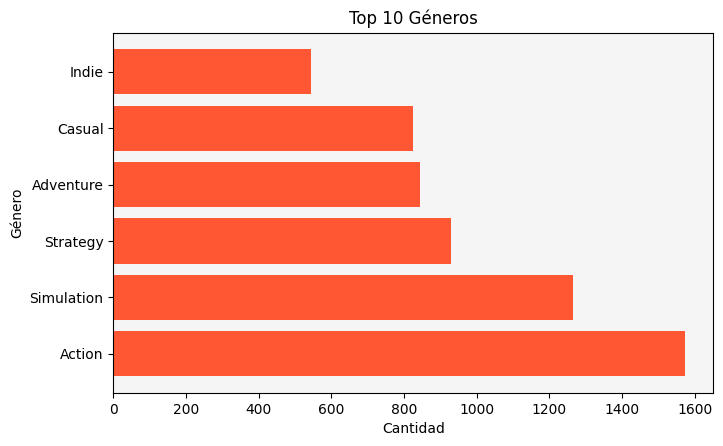

In [117]:
import matplotlib.pyplot as plt

# Convertir listas en tuplas en la columna 'genres'
games['genres'] = games['genres'].apply(tuple)

# Agrupar y contar
top_genre = games.groupby('genres').count().reset_index()[['genres', 'game_title']].sort_values(by='game_title', ascending=False)[:10]

# Configurar la gráfica
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias

# Deshacerse de las tuplas en 'genres' seleccionando el primer elemento
top_genre['genres'] = top_genre['genres'].apply(lambda x: x[0] if isinstance(x, tuple) else x)

plt.barh(top_genre['genres'], top_genre['game_title'], color='#FF5733')  # Usar 'game_title' en lugar de 'id'
plt.xlabel('Cantidad')
plt.ylabel('Género')
plt.title('Top 10 Géneros')

# Ajustar detalles
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)
plt.gca().set_facecolor('whitesmoke') 

# Mostrar la gráfica
plt.show()


In [118]:
# Se agrupan, ordenan y seleccionan los datos relevantes
top_games = all_dfs.groupby('game_title')['recommend'].sum().sort_values(ascending=True)[-10:]
top_games

game_title
Portal 2                             292
DayZ                                 438
Borderlands 2                        443
Warframe                             451
Rust                                 565
Left 4 Dead 2                        578
Terraria                             581
Unturned                             755
Garry's Mod                         1343
Counter-Strike: Global Offensive    2760
Name: recommend, dtype: object

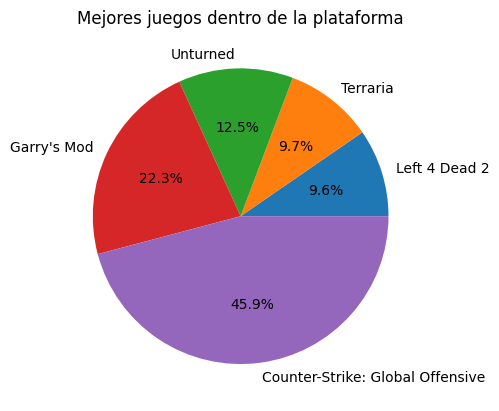

In [119]:
# Se printean porcentajes
fig, ax = plt.subplots()
ax.pie(top_games[-5:],labels=top_games.index[-5:],autopct='%1.1f%%')
plt.title('Mejores juegos dentro de la plataforma')
plt.show()

In [120]:
# Se hace un ajuste del dataframe original para evitar datos extra que no necesitamos
s_through_years = all_dfs[['game_title','sentiment','posted']].drop_duplicates().copy()
s_through_years['posted'] = pd.to_datetime(s_through_years['posted']).dt.year

In [121]:
# El respectivo binning de los datos
group = s_through_years.groupby('posted')['sentiment'].value_counts()
df_group = pd.DataFrame(group).reset_index()

In [122]:
#Datos agrupados
df_group

,posted,sentiment,count
0,2010,2,29
1,2010,1,17
2,2010,0,4
3,2011,2,261
4,2011,1,59
5,2011,0,33
6,2012,2,501
7,2012,1,184
8,2012,0,108
9,2013,2,2178


In [123]:
# Dividimos nuestro df y hacemos un filtrado para dividir los sentimientos en distintas tablas
good = df_group[df_group['sentiment']==2]
neutral = df_group[df_group['sentiment']==1]
bad = df_group[df_group['sentiment']==0]

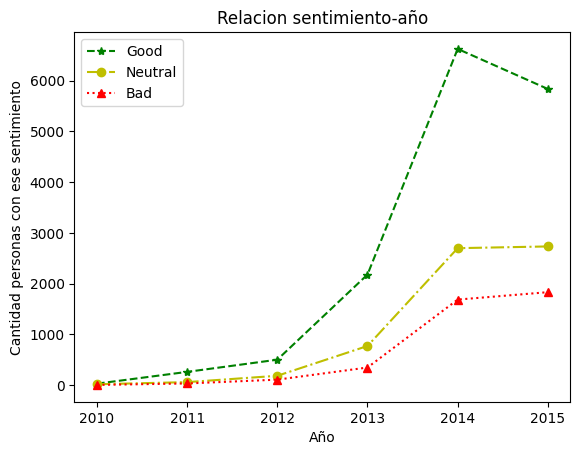

In [124]:
# Configuramos las pendientes para una buena ilustración
plt.plot(good['posted'],good['count'], linestyle='--',marker='*', label='Good',color='g')
plt.plot(neutral['posted'],neutral['count'],linestyle='-.',marker='o',label='Neutral',color='y')
plt.plot(bad['posted'],bad['count'],linestyle=':',marker='^',label='Bad', color='r')
# Configuramos datos dentro de la gráfica
plt.title('Relacion sentimiento-año')
plt.xlabel('Año')
plt.ylabel('Cantidad personas con ese sentimiento')
plt.legend()
# Printeamos
plt.show()

In [ ]:
'''Como podemos ver realmente no hay mucha cambio entre los datos durante el transcurso del tiempo aparte de su aumento de volumen a 
través de los años que a su vez representa el aumento en el volumen usuarios que entran a la plataforma y de ese pequeño decrecimiento 
entre el 2014 y el 2015'''

In [ ]:
#Cual es el rango entre los precios de los juegos dentro de la plataforma?
#Queremos saber si todos los precios de los juegos realmente respetan un margen a pesar de la libertad que se le da a los desarrolladores para asignarles un valor.

In [125]:
# Se eligen los datos que queremos y revisamos su distribución
prices = all_dfs[['game_title','price']].drop_duplicates()
prices.describe()

,price
count,1936.000000
mean,11.619509
std,20.673467
min,0.000000
25%,3.990000
50%,9.990000
75%,14.990000
max,771.710000


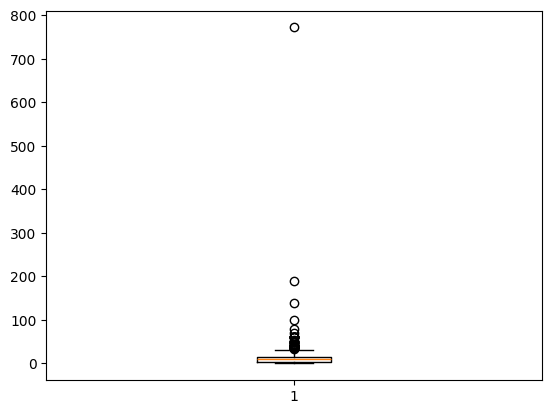

In [126]:
# Vista de su distribucion
boxplot = plt.boxplot(prices['price'])
outliers = boxplot['fliers'][0].get_data()[1]
plt.show()

In [127]:
# Se consiguen los outliers de la gráfica
outliers = pd.Series(outliers).sort_values(ascending=True)

In [128]:
# Se omiten los outliers dentro de la columna original
prices = prices[prices['price'] < outliers[0]]

In [129]:
prices.describe()

,price
count,1873.000000
mean,9.932931
std,7.836136
min,0.000000
25%,3.990000
50%,9.990000
75%,14.990000
max,34.990000


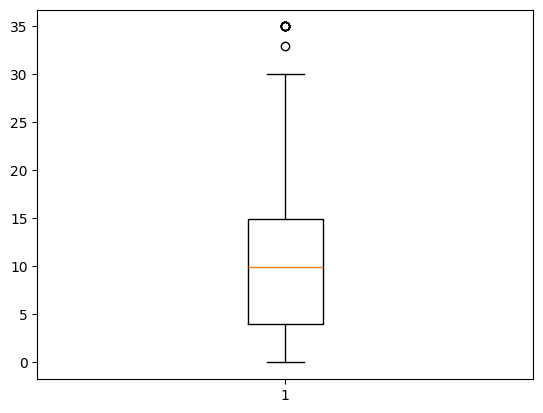

In [130]:
# Vista final
plt.boxplot(prices['price'])
plt.show()